# 4.2 손실함수

### 4.2.1 오차제곱합
---

In [62]:
import numpy as np


In [2]:
#손실함수-오차제곱합
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [.1,.05,.6,.0,.05,.1,.0,.1,.0,.0]

print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003


In [6]:
y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.5975


### 4.2.2 교차 엔트로피 오차
---

In [13]:
# 손실함수-교차 엔트로피 오차
# delta를 y(신경망의 출력) 값에 더해주는 이유 : log0은 정의 할 수 없을 뿐더러 이론적으로 -무한대에 수렴하기 때문에, 이것을 방지하여 반드시
# 0일 수 없도록 아주 작은 상수(1e-7 = 10^-7)을 더해준 것.
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


In [12]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))


0.510825457099338


In [17]:
y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습
---

In [18]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [19]:
#원핫 인코딩으로 정답 위치의 원소만 1이고 나머지는 모두 0인 상태로 불러옴
(x_train, t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) #60000개 데이터와 입력값은 784개가 있다
print(t_train.shape) #60000개 데이터에 대한 정답은 총 10개

(60000, 784)
(60000, 10)


In [20]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

# 무작위로 10개 추출해서 미니배치함
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


In [11]:
t_batch

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [12]:
np.random.choice(60000, 10)
# 0이상 6만 미만의 10개 수를 배열로 리턴시켜줌
# 이것을 인덱스로 사용하는 방식


array([55649, 47756, 16930, 14439, 19486, 42971, 11206, 56413, 17126,
       15952])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
---

In [21]:
# 정답 레이블 y가 원핫 인코딩으로 구성되어 있을 경우 앞서 작성한 교차 엔트로피 오차 함수와 같이 구현할 수 있다.
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


In [22]:
#정답 레이블이 원핫 인코딩이 아니고 2, 7 등 숫자 레이블로 주어졌다면 아래와 같이 교차 엔트로피 오차 함수를 구현할 수 있다
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

# 4.3 수치 미분

### 4.3.1 미분
___

In [23]:
#좋지 못한 코드, 반올림 오차 문제가 생김. 매우 작은 h는 부동소수점계산 때 오류
#전방 차분
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x))/h

In [27]:
np.float32(1e-50)

0.0

#### 수치 미분 (위 코드의 개선)
---

In [32]:
#중심 차분을 사용 x와 x+h 의 차분이 아닌 x-h와 x+h 의 차분을 말함
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예
---

In [33]:
#y = 0.01x^2 + 0.1x 함수
def function_1(x):
    return 0.01* x ** 2 + 0.1 * x

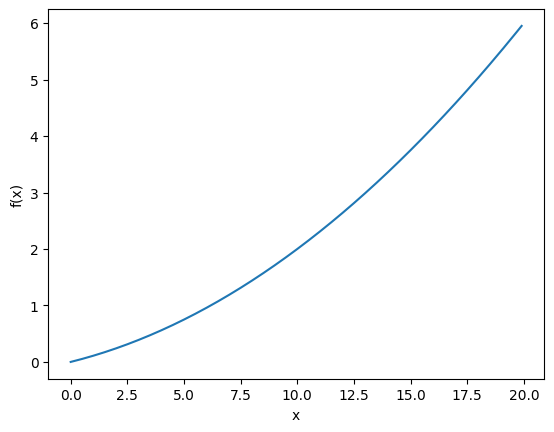

In [29]:
import matplotlib.pylab as plt

x = np.arange(.0, 20.0, .1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [34]:
numerical_diff(function_1, 5)

0.1999999999990898

In [35]:
numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분
---

In [43]:
def function_2(x):
    return np.sum(x**2)


- function_tmp1(x0)  
x0 = 3, x1=4일 때, x0에 대한 편미분을 구하여라 - 이에 대한 함수 작성

In [44]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [38]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

- function_tmp2(x1)  
x0 = 3, x1 = 4 일 때, x1에 대한 편미분을 구하여라 - 이에 대한 함수 작성

In [39]:
def function_tmp2(x1):
    return x1*x1 + 3.0**2.0

In [40]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 기울기
---

In [49]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        temp_val = x[idx]

        x[idx] = temp_val + h
        fxh1 = f(x)

        x[idx] = temp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = temp_val
    return grad

In [46]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [47]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [69]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 4.4.1 경사법(경사 하강법)
---

In [52]:
def gradient_descent(f, init_x, lr=0.01, setp_num=100):
    x = init_x

    for _ in range(setp_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x


In [57]:
def function_2(x):
    return np.sum(x**2)


init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, setp_num=100))


[-0.39785867  0.53047822]


In [58]:
#학습률이 너무 큰 예시 lr = 10, 값이 완전히 발산해버림
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, setp_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [59]:
#학습률이 너무 작은 예시 lr = 1e-10, 값이 거의 갱신되지 않음
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, setp_num = 100)

#학습률과 같은 매개변수를 하이퍼파라미터라 칭함

array([-2.99999994,  3.99999992])

### 4.4.2 신경망에서의 기울기
---

import 모듈
softmax - 활성화 함수
cross_entropy_error - 교차 엔트로피 오차 함수
numerical_gradient 

In [2]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import (
    softmax,
    cross_entropy_error,
)  # common안 functions 모듈에서 softmax함수와, cross_entropy_error 함수 임포트
from common.gradient import (
    numerical_gradient,
)  # common안 gradient 모듈에서 numerical_gradient함수 임포트


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [66]:
net = simpleNet()
print(net.W)
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[[-0.26655713  0.42239657 -1.29787469]
 [ 0.26774977 -0.89362348 -1.34134846]]
[ 0.08104052 -0.55082319 -1.98593843]
0


In [68]:
t = np.array([0,0,1])
net.loss(x, t)

2.572728327227523

In [72]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)
#람다를 사용하여 구현하는 방법
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)

[[ 0.3618538   0.19234999 -0.55420379]
 [ 0.5427807   0.28852498 -0.83130569]]


# 4.5 학습 알고리즘 구현하기
---

### 4.5.1 2층 신경망 클래스 구현하기
---

In [74]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(
        self, input_size, hidden_size, output_size, weight_init_std=0.01
    ):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(
            input_size, hidden_size
        )
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(
            hidden_size, output_size
        )
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads


- params : 가중치 매개변수(ex. key 'W1' 은 1번 레이어의 가중치 key 'b1' 은 1번 레이어의 편향 정보를 가짐)
- grads : params 변수와 대응되는 매개변수의 기울기 값 (params의 key와 같은 이름으로 가중치의 기울기를 가짐)

In [77]:
#params을 직접 확인
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [78]:
#grads를 직접 확인
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
#grads를print(grads['b1'].shape)
#grads를print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(10,)


### 4.5.2 미니배치 학습 구현하기
---

In [83]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 10   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


/usr/local/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [84]:
pbar = tqdm(range(iters_num))

for i in pbar:
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    pbar.set_description_str(f"loss: {loss: .4f}")

    train_loss_list.append(loss)


loss:  2.1691: 100%|██████████| 10/10 [01:04<00:00,  6.41s/it]


학습의 1에폭당 훈련 데이터와 시험 데이터에 대한 정확도 기록을 위해 몇가지 코드를 추가

In [92]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복 횟수
iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10  # 반복 횟수를 적절히 설정한다. 기존 값은 10000회 였으나 학습이 너무 오래걸리는 관계로 10회로 감소
train_size = x_train.shape[0]
batch_size = 10   # 미니배치 크기, 기존 값은 100이었으나 빠른 컴파일을 위해 10으로 감소
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(loss)
    
    #1에폭당 정확도를 계산
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc "+str(train_acc)+", "+str(test_acc))

2.2326027553768655
train acc, test acc 0.10218333333333333, 0.101
2.263030387369663
2.2157456174250947
2.2286156196364573
2.2705221049391793
2.1946714485343213
2.246979124846135
2.234136001396979
2.2358510902174844
2.1865328976664222


### 여기서 1에폭이란 학습에서 훈련 데이터를 모두 소진했을 때의 반복 횟수가 단위가 된다
예를 들면 10000개 데이터를 100개의 미니배치로 학습시킬 경우, 경사하강법으로 학습시킬 시 100회를 반복시키면 모든 훈련데이터를 소진한다.
이경우 1에폭의 의미는 100회를 의미한다.

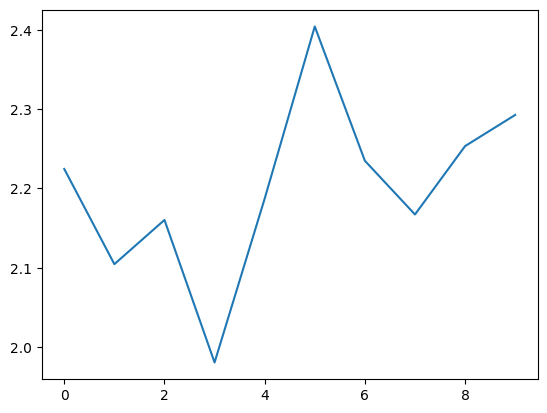

In [91]:
plt.plot(train_loss_list)

